In [26]:
#LETS WORK WITH CIFAR 10 DATA 

#ABOUT CIFAR 10 

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

#How to get Images 

 we have  a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

 

In [27]:
#STEP 1 : LOAD CIFAR 10 DATA
import os
os.path.abspath(os.getcwd())

'/content'

In [28]:
#SECTION1 REQUIRED LIBRARY 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

from drive.MyDrive.S8.utils import Dataloader
from drive.MyDrive.S8.utils import show_images
from drive.MyDrive.S8.utils import classcount
from drive.MyDrive.S8.models import BasicModel
from drive.MyDrive.S8.models import RESNET
from drive.MyDrive.S8.utils import plot_misclassified_image
from drive.MyDrive.S8.utils import perClassResult
from drive.MyDrive.S8.utils import train
from drive.MyDrive.S8.utils import test

In [29]:
#DOWNLOAD THE IMAGES 

class Args:

    # Data Loading
    # ============

    # train_batch_size = 64
    # val_batch_size = 64
    num_workers = 4
    batch_size = 128


    # Regularization
    # ==============
    #dropout = 0.1
    dropout = 0

    # Training
    # ========
    random_seed = 1
    epochs = 15
    learning_rate = 0.01
    momentum = 0.9


In [30]:
#get mean and standard deviation of images 
import torchvision
import torchvision.transforms as transforms
import torch
trainset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = Dataloader.calculate_mean_std(trainset)

# mean =[0.5,0.5,0.5]
# std =[0.5,0.5,0.5]

Files already downloaded and verified


In [31]:
import torchvision
import torchvision.transforms as transforms
import torch
trainloader,testloader=Dataloader.train_test_loader(Args.batch_size,Args.num_workers)
classes = Dataloader.get_classes()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


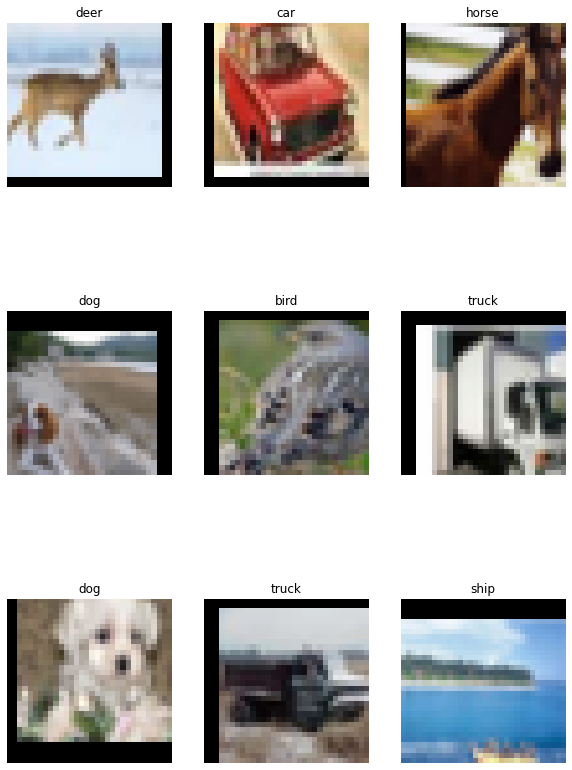

In [32]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='raw')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


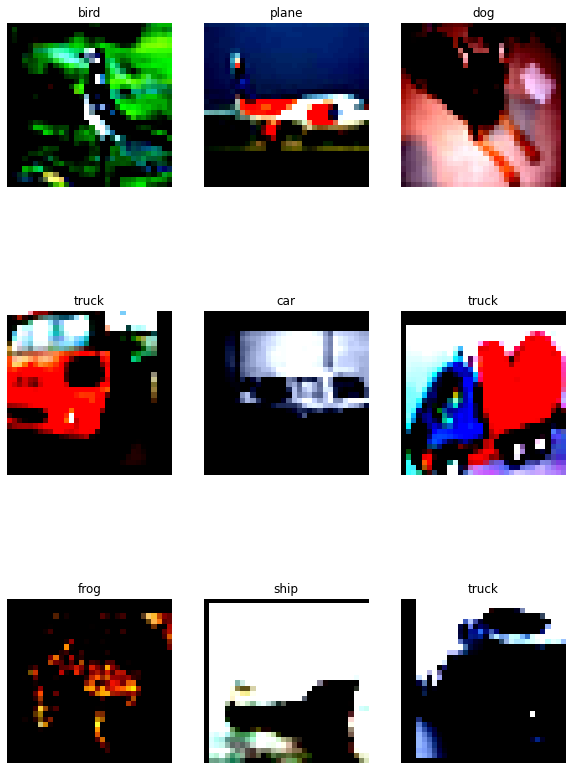

In [33]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [34]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = classcount.get_train_class_count(dataset,classes)
print(class_count)

Files already downloaded and verified
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [35]:
!pip install torchsummary
from torchsummary import summary
import torchvision
from torchvision import  models
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#working 
#01.Basic model from a different file 
#model = BasicModel.Net().to(device)

# #02.Resnet 18 from a different file i.e All resnet layers are unfreezed 
# model = RESNET.ResNet18().to(device) 

# #03.Resnet 18 from pytorch pretrained i.e All resnet layers are unfreezed 
# model = models.resnet18(pretrained=True) 
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, 10)
# model = model.to(device)

# NOTE :02 and 03 are same 


#04.Resnet 18 pretrained from pytorch freeze all layers 
model = models.resnet50(pretrained=True)
#freeze all layers 
for param in model.parameters():
    param.requires_grad = False   
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

# #05 . Renet 18 selective freezing unfreezing of layers 
# model = models.resnet50(pretrained=True)
# for name, child in model.named_children():
#     if name in ['layer3', 'layer4']:
#         print(name + 'has been unfrozen.')
#         for param in child.parameters():
#             param.requires_grad = True
#     else:
#         for param in child.parameters():
#             param.requires_grad = False
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, 10)
# model = model.to(device)

summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]           4,096
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]          16,384
      BatchNorm2d-12            [-1, 256, 8, 8]             512
           Conv2d-13            [-1, 256, 8, 8]          16,384
      BatchNorm2d-14            [-

In [36]:
# see the layer info 
for name, child in model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [37]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
#criterion = nn.CrossEntropyLoss()
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [38]:
#Test
EPOCHS = 50

trainer = train.Trainer()
tester  = test.Tester()
lambda_l1=0
for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1, "last LR=",scheduler.get_last_lr(), "CURRENT LR = ", scheduler.get_lr())
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, lambda_l1)
  scheduler.step()
  tester.test(model, device, testloader)



test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=2.034543514251709 Batch_id=390 Accuracy=38.69: 100%|██████████| 391/391 [00:27<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.2570, Test Accuracy: 4216/10000 (42.16%)

EPOCH: 2 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.7422380447387695 Batch_id=390 Accuracy=42.74: 100%|██████████| 391/391 [00:27<00:00, 14.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3367, Test Accuracy: 4364/10000 (43.64%)

EPOCH: 3 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.4729191064834595 Batch_id=390 Accuracy=43.60: 100%|██████████| 391/391 [00:27<00:00, 14.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.6092, Test Accuracy: 4297/10000 (42.97%)

EPOCH: 4 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.780698537826538 Batch_id=390 Accuracy=44.39: 100%|██████████| 391/391 [00:27<00:00, 14.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.5187, Test Accuracy: 4516/10000 (45.16%)

EPOCH: 5 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.3837497234344482 Batch_id=390 Accuracy=44.32: 100%|██████████| 391/391 [00:27<00:00, 14.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3863, Test Accuracy: 4512/10000 (45.12%)

EPOCH: 6 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.8012644052505493 Batch_id=390 Accuracy=45.06: 100%|██████████| 391/391 [00:27<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.5136, Test Accuracy: 4500/10000 (45.00%)

EPOCH: 7 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.5425704717636108 Batch_id=390 Accuracy=44.73: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.7361, Test Accuracy: 4500/10000 (45.00%)

EPOCH: 8 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.5194644927978516 Batch_id=390 Accuracy=45.37: 100%|██████████| 391/391 [00:27<00:00, 13.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3954, Test Accuracy: 4347/10000 (43.47%)

EPOCH: 9 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.738516092300415 Batch_id=390 Accuracy=45.27: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.6476, Test Accuracy: 4478/10000 (44.78%)

EPOCH: 10 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.5723713636398315 Batch_id=390 Accuracy=45.72: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.0020, Test Accuracy: 4489/10000 (44.89%)

EPOCH: 11 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.5302801132202148 Batch_id=390 Accuracy=44.97: 100%|██████████| 391/391 [00:28<00:00, 13.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.5069, Test Accuracy: 4159/10000 (41.59%)

EPOCH: 12 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=1.6683309078216553 Batch_id=390 Accuracy=45.68: 100%|██████████| 391/391 [00:27<00:00, 14.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.6741, Test Accuracy: 4547/10000 (45.47%)

EPOCH: 13 last LR= [0.001] CURRENT LR =  [0.0001]


Train set: Loss=1.512418508529663 Batch_id=390 Accuracy=48.26: 100%|██████████| 391/391 [00:26<00:00, 14.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.5275, Test Accuracy: 4873/10000 (48.73%)

EPOCH: 14 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.329574465751648 Batch_id=390 Accuracy=49.42: 100%|██████████| 391/391 [00:27<00:00, 14.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.5175, Test Accuracy: 4822/10000 (48.22%)

EPOCH: 15 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.3906629085540771 Batch_id=390 Accuracy=49.61: 100%|██████████| 391/391 [00:27<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4790, Test Accuracy: 4879/10000 (48.79%)

EPOCH: 16 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.3560068607330322 Batch_id=390 Accuracy=49.64: 100%|██████████| 391/391 [00:28<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.5043, Test Accuracy: 4878/10000 (48.78%)

EPOCH: 17 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.7638620138168335 Batch_id=390 Accuracy=49.71: 100%|██████████| 391/391 [00:27<00:00, 13.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4130, Test Accuracy: 4801/10000 (48.01%)

EPOCH: 18 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.6395671367645264 Batch_id=390 Accuracy=49.54: 100%|██████████| 391/391 [00:27<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4315, Test Accuracy: 4776/10000 (47.76%)

EPOCH: 19 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.4937816858291626 Batch_id=390 Accuracy=50.07: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4882, Test Accuracy: 4867/10000 (48.67%)

EPOCH: 20 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.3268678188323975 Batch_id=390 Accuracy=49.89: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4822, Test Accuracy: 4971/10000 (49.71%)

EPOCH: 21 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.3710505962371826 Batch_id=390 Accuracy=49.66: 100%|██████████| 391/391 [00:28<00:00, 13.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4046, Test Accuracy: 4837/10000 (48.37%)

EPOCH: 22 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.4534928798675537 Batch_id=390 Accuracy=49.74: 100%|██████████| 391/391 [00:26<00:00, 14.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3941, Test Accuracy: 4957/10000 (49.57%)

EPOCH: 23 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.5016868114471436 Batch_id=390 Accuracy=49.93: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4452, Test Accuracy: 4915/10000 (49.15%)

EPOCH: 24 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=1.399477481842041 Batch_id=390 Accuracy=50.34: 100%|██████████| 391/391 [00:28<00:00, 13.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4844, Test Accuracy: 4994/10000 (49.94%)

EPOCH: 25 last LR= [0.0001] CURRENT LR =  [1e-05]


Train set: Loss=1.3393909931182861 Batch_id=390 Accuracy=50.45: 100%|██████████| 391/391 [00:27<00:00, 14.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4226, Test Accuracy: 4975/10000 (49.75%)

EPOCH: 26 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.3903521299362183 Batch_id=390 Accuracy=50.45: 100%|██████████| 391/391 [00:27<00:00, 14.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4451, Test Accuracy: 4961/10000 (49.61%)

EPOCH: 27 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.5353585481643677 Batch_id=390 Accuracy=50.22: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4468, Test Accuracy: 4910/10000 (49.10%)

EPOCH: 28 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.4300556182861328 Batch_id=390 Accuracy=50.45: 100%|██████████| 391/391 [00:27<00:00, 14.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4275, Test Accuracy: 4848/10000 (48.48%)

EPOCH: 29 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.3568518161773682 Batch_id=390 Accuracy=50.48: 100%|██████████| 391/391 [00:27<00:00, 14.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3887, Test Accuracy: 4990/10000 (49.90%)

EPOCH: 30 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.4222553968429565 Batch_id=390 Accuracy=50.58: 100%|██████████| 391/391 [00:26<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3786, Test Accuracy: 4971/10000 (49.71%)

EPOCH: 31 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.5445773601531982 Batch_id=390 Accuracy=50.50: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3912, Test Accuracy: 4954/10000 (49.54%)

EPOCH: 32 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.3975545167922974 Batch_id=390 Accuracy=50.61: 100%|██████████| 391/391 [00:27<00:00, 14.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4329, Test Accuracy: 4913/10000 (49.13%)

EPOCH: 33 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.355114221572876 Batch_id=390 Accuracy=50.48: 100%|██████████| 391/391 [00:27<00:00, 14.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4310, Test Accuracy: 4932/10000 (49.32%)

EPOCH: 34 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.475356101989746 Batch_id=390 Accuracy=50.53: 100%|██████████| 391/391 [00:27<00:00, 14.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3665, Test Accuracy: 4952/10000 (49.52%)

EPOCH: 35 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.5520052909851074 Batch_id=390 Accuracy=50.65: 100%|██████████| 391/391 [00:27<00:00, 14.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4211, Test Accuracy: 4920/10000 (49.20%)

EPOCH: 36 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=1.6437031030654907 Batch_id=390 Accuracy=50.75: 100%|██████████| 391/391 [00:27<00:00, 13.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3981, Test Accuracy: 4965/10000 (49.65%)

EPOCH: 37 last LR= [1e-05] CURRENT LR =  [1.0000000000000002e-06]


Train set: Loss=1.2993510961532593 Batch_id=390 Accuracy=50.52: 100%|██████████| 391/391 [00:27<00:00, 14.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3889, Test Accuracy: 4942/10000 (49.42%)

EPOCH: 38 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.4640989303588867 Batch_id=390 Accuracy=50.92: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4180, Test Accuracy: 4850/10000 (48.50%)

EPOCH: 39 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.5066498517990112 Batch_id=390 Accuracy=50.38: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4285, Test Accuracy: 4948/10000 (49.48%)

EPOCH: 40 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.6111795902252197 Batch_id=390 Accuracy=50.83: 100%|██████████| 391/391 [00:27<00:00, 14.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3674, Test Accuracy: 5012/10000 (50.12%)

EPOCH: 41 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.374894380569458 Batch_id=390 Accuracy=50.41: 100%|██████████| 391/391 [00:27<00:00, 14.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3931, Test Accuracy: 4949/10000 (49.49%)

EPOCH: 42 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.7741419076919556 Batch_id=390 Accuracy=50.55: 100%|██████████| 391/391 [00:27<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4018, Test Accuracy: 4946/10000 (49.46%)

EPOCH: 43 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.415841817855835 Batch_id=390 Accuracy=50.58: 100%|██████████| 391/391 [00:27<00:00, 14.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3916, Test Accuracy: 4920/10000 (49.20%)

EPOCH: 44 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.3910348415374756 Batch_id=390 Accuracy=50.87: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4547, Test Accuracy: 4909/10000 (49.09%)

EPOCH: 45 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.2106773853302002 Batch_id=390 Accuracy=50.23: 100%|██████████| 391/391 [00:28<00:00, 13.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4107, Test Accuracy: 4914/10000 (49.14%)

EPOCH: 46 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.7950947284698486 Batch_id=390 Accuracy=50.14: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4037, Test Accuracy: 4925/10000 (49.25%)

EPOCH: 47 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.385071039199829 Batch_id=390 Accuracy=50.95: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4045, Test Accuracy: 4946/10000 (49.46%)

EPOCH: 48 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=1.2738686800003052 Batch_id=390 Accuracy=50.81: 100%|██████████| 391/391 [00:27<00:00, 14.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3754, Test Accuracy: 4970/10000 (49.70%)

EPOCH: 49 last LR= [1.0000000000000002e-06] CURRENT LR =  [1.0000000000000002e-07]


Train set: Loss=1.310861349105835 Batch_id=390 Accuracy=50.71: 100%|██████████| 391/391 [00:27<00:00, 14.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.3495, Test Accuracy: 4965/10000 (49.65%)

EPOCH: 50 last LR= [1.0000000000000002e-06] CURRENT LR =  [1.0000000000000002e-06]


Train set: Loss=1.3417856693267822 Batch_id=390 Accuracy=50.32: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]



Test set: Average loss: -2.3570, Test Accuracy: 4997/10000 (49.97%)



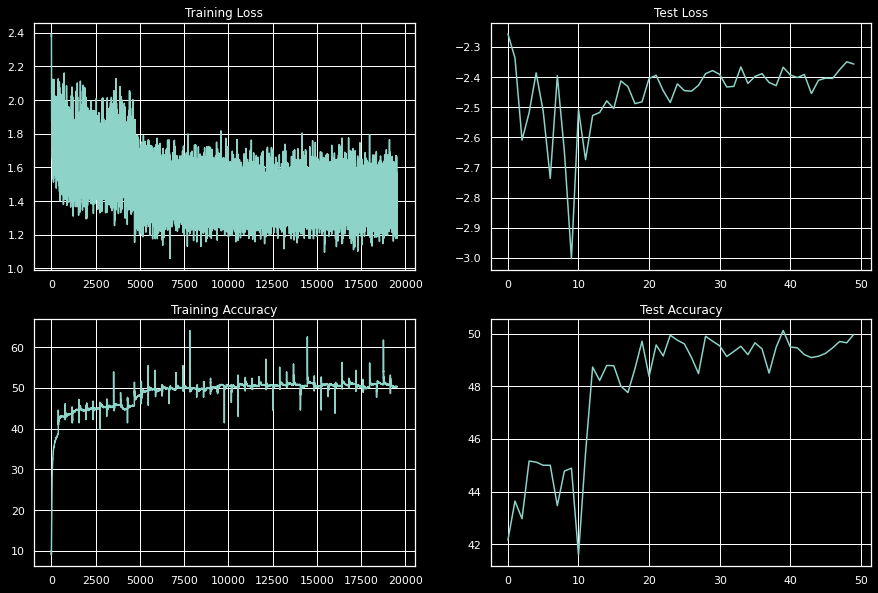

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("dark_background")

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()

In [40]:

torch.save(model,'./data/cifar')


In [41]:
#load the model
model = torch.load('./data/cifar')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

Accuracy of plane : 28 %
Accuracy of   car : 70 %
Accuracy of  bird : 30 %
Accuracy of   cat : 32 %
Accuracy of  deer : 67 %
Accuracy of   dog : 45 %
Accuracy of  frog : 63 %
Accuracy of horse : 46 %
Accuracy of  ship : 52 %
Accuracy of truck : 60 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


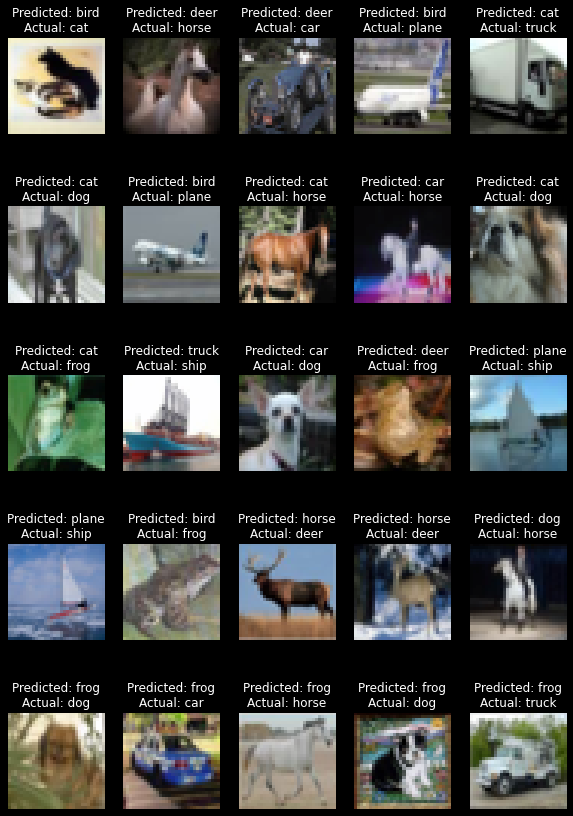

In [43]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes,mean,std,format='raw')

In [44]:
len(train_acc),len(train_losses)

(19550, 19550)